In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# add values on top of each bar
def bar_annotation(ax):
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), \
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [3]:
# on x axis display all lables
def line_labels(ax, frame):
    ax.set_xticks(range(len(frame)));
    ax.set_xticklabels([item for item in frame.index.tolist()], rotation=90);

# Explore cases based on location dataset

In [4]:
loc_case = pd.read_csv("dataset/processed_location_Sep20th2020.csv")

## Statisics for numerial attributes

In [5]:
print(loc_case.info())
loc_case.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3954 entries, 0 to 3953
Data columns (total 12 columns):
Province_State         3786 non-null object
Country_Region         3954 non-null object
Last_Update            3954 non-null object
Lat                    3874 non-null float64
Long_                  3874 non-null float64
Confirmed              3954 non-null int64
Deaths                 3954 non-null int64
Recovered              3954 non-null int64
Active                 3952 non-null float64
Combined_Key           3954 non-null object
Incidence_Rate         3874 non-null float64
Case-Fatality_Ratio    3906 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 370.8+ KB
None


,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
count,3874.000000,3874.000000,3.954000e+03,3954.000000,3.954000e+03,3.952000e+03,3874.000000,3906.000000
mean,35.987924,-72.337046,7.760496e+03,241.740769,5.291398e+03,2.228632e+03,1538.572813,2.355818
std,12.872793,53.019022,4.184036e+04,1476.661533,5.315287e+04,4.440693e+04,1368.457332,3.538503
min,-52.368000,-174.159600,0.000000e+00,0.000000,0.000000e+00,-2.577446e+06,0.000000,0.000000
25%,33.270421,-96.611164,1.370000e+02,1.000000,0.000000e+00,1.140000e+02,618.904146,0.637729
50%,37.938284,-86.878438,4.985000e+02,9.000000,0.000000e+00,4.210000e+02,1204.351179,1.633422
75%,42.158587,-77.639009,2.129000e+03,48.000000,0.000000e+00,1.453000e+03,2097.993633,3.006621
max,71.706900,178.065000,1.167496e+06,37076.000000,2.577446e+06,3.379130e+05,14871.183644,108.812950


## 1.Number of missing value for attributes

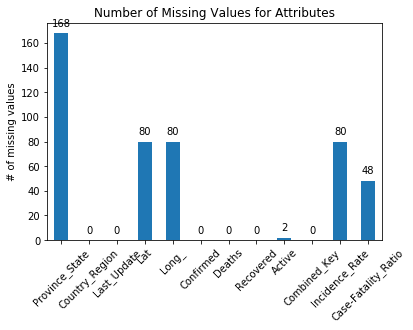

In [6]:
nan_count = loc_case.isnull().sum()
ax = nan_count.plot(kind='bar', rot=45, title = "Number of Missing Values for Attributes")
ax.set_ylabel('# of missing values')
bar_annotation(ax)

## 2. Visualize the longtitude and latitude for each report region in the dataset
## There are more reports in US than in any other countries

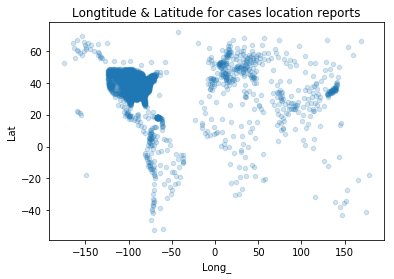

In [7]:
loc_case.plot(kind='scatter', x="Long_", y="Lat", alpha=0.2, title = "Longtitude & Latitude for cases location reports")

## 3. The update Time of reports
## Almost all reports are updated on 2020-09-20

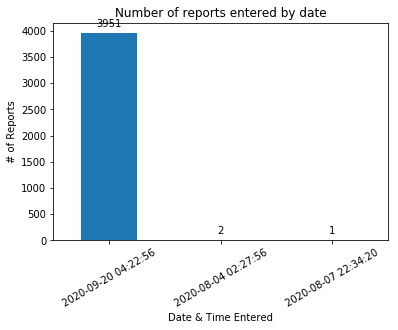

In [8]:
last_update = loc_case['Last_Update'].dropna().value_counts()
ax = last_update.plot(kind='bar', rot=30, title = "Number of reports entered by date")
ax.set_ylabel('# of Reports')
ax.set_xlabel('Date & Time Entered')
bar_annotation(ax)

## 4. Number of reports in each province
## Most reports came from US States with more than 250 reports from Texas alone.

Text(0, 0.5, '# of Reports')

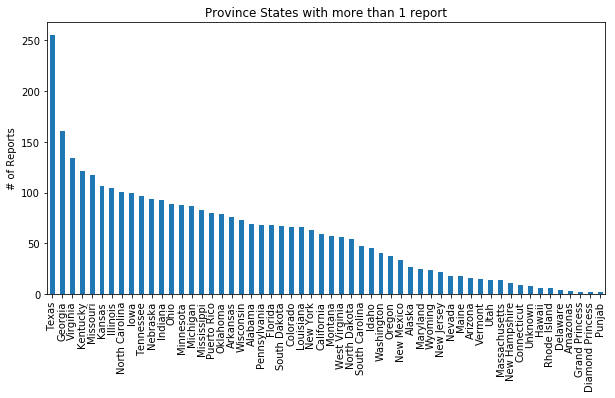

In [9]:
province = loc_case['Province_State'].dropna().value_counts()
province = province[province>1]
ax = province.plot(kind='bar', figsize=(10,5), rot=90, title = "Province States with more than 1 report")
ax.set_ylabel('# of Reports')

## 5. Number of reports form each country, about 83% of reports are from US

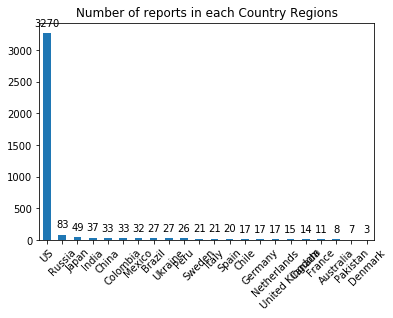

In [10]:
country_region = loc_case['Country_Region'].dropna().value_counts()
country_region = country_region[country_region>1]
ax = country_region.plot(kind='bar', rot=45, title = "Number of reports in each Country Regions")
bar_annotation(ax)

## 6. Confirmed, deaths, recovered and active cases for countries with confirmed cases above average.
## US, Brazil and India have significantly more confirmed cases than other countries.

Text(0.5, 0, 'Country')

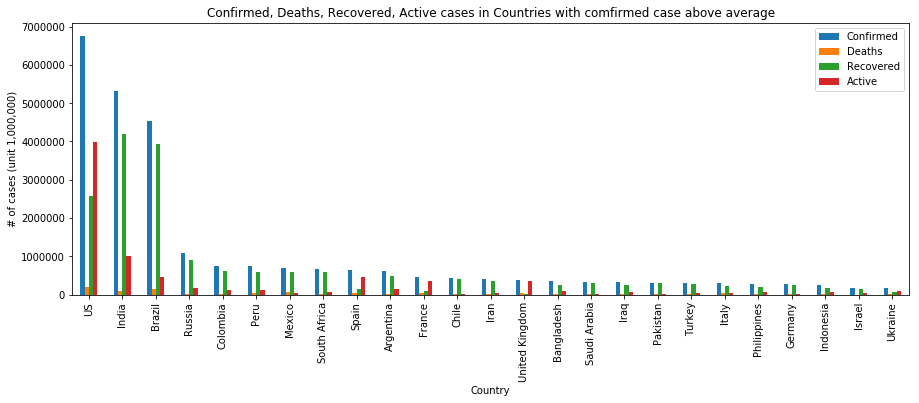

In [11]:
cdra_sum = loc_case.groupby('Country_Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum', 'Active': 'sum'})
cdra_sum_above = cdra_sum[cdra_sum['Confirmed']>cdra_sum['Confirmed'].mean()].sort_values(by=['Confirmed'], ascending = False)
ax = cdra_sum_above.plot(kind='bar', figsize=(15, 5), title='Confirmed, Deaths, Recovered, Active cases in Countries with comfirmed case above average')
ax.set_ylabel('# of cases (unit 1,000,000)')
ax.set_xlabel('Country')

## 7. Incidence Rate (# case per 100,000 persons) for each country

Text(0, 0.5, 'Cases per 100,000 persons')

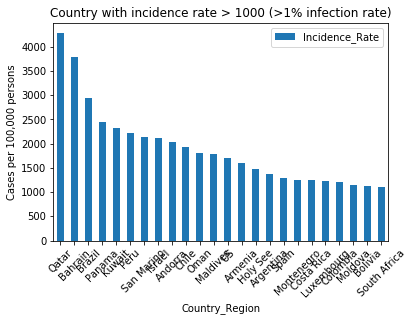

In [12]:
ir = loc_case.loc[:,['Country_Region','Incidence_Rate']]
ir_mean = ir.groupby('Country_Region').agg({'Incidence_Rate': 'mean'}).sort_values(by = 'Incidence_Rate', ascending = False)
ir_mean = ir_mean[ir_mean['Incidence_Rate'] > 1000]
ax = ir_mean.plot(kind='bar', rot=45, title = "Country with incidence rate > 1000 (>1% infection rate)")
ax.set_ylabel('Cases per 100,000 persons')

## 8. Countries with fatality rate > 5%

Text(0, 0.5, 'Fetality Rate %')

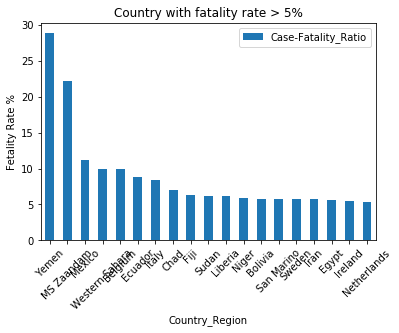

In [13]:
cfr = loc_case.loc[:,['Country_Region','Case-Fatality_Ratio']]
cfr_mean = cfr.groupby('Country_Region').agg({'Case-Fatality_Ratio': 'mean'}).sort_values(by = 'Case-Fatality_Ratio', ascending = False)
cfr_mean = cfr_mean[cfr_mean['Case-Fatality_Ratio'] > 5]
ax = cfr_mean.plot(kind='bar', rot=45, title = "Country with fatality rate > 5%")
ax.set_ylabel('Fetality Rate %')

## 9. Distribution of Incidence Rate

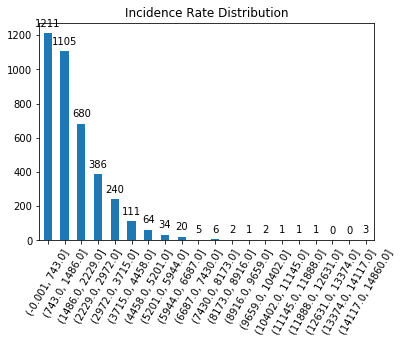

In [14]:
ir = loc_case[pd.to_numeric(loc_case['Incidence_Rate'], errors='coerce').notnull()]['Incidence_Rate'].astype(float).astype(int)
out = pd.cut(ir, bins=np.arange(0, int(loc_case['Incidence_Rate'].max()), int(loc_case['Incidence_Rate'].max()/20)), include_lowest=True)
ax = out.value_counts(sort=False).plot(kind='bar', rot = 60, title = "Incidence Rate Distribution")
bar_annotation(ax)

## 10. Distribution of Case Fatality Ratio 

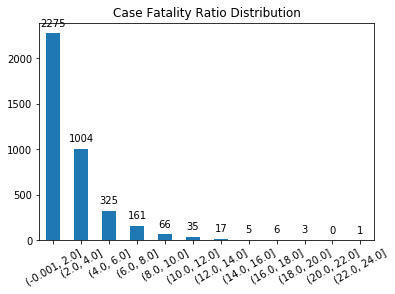

In [15]:
cfr = loc_case[pd.to_numeric(loc_case['Case-Fatality_Ratio'], errors='coerce').notnull()]['Case-Fatality_Ratio'].astype(float)
out = pd.cut(cfr, bins=np.arange(0, 25, 2), include_lowest=True)
ax = out.value_counts(sort=False).plot(kind='bar', rot = 30, title = "Case Fatality Ratio Distribution")
bar_annotation(ax)

## Correlation Matrix shows correlation between numerical attributes

In [16]:
loc_case.dropna().corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
Lat,1.000000,-0.059566,-0.249314,-0.196556,-0.256188,-0.125529,-0.184188,-0.045289
Long_,-0.059566,1.000000,0.184273,0.125358,0.196190,0.079599,-0.230069,0.035607
Confirmed,-0.249314,0.184273,1.000000,0.824197,0.942131,0.689501,0.024319,0.062647
Deaths,-0.196556,0.125358,0.824197,1.000000,0.704412,0.696252,0.010911,0.205317
Recovered,-0.256188,0.196190,0.942131,0.704412,1.000000,0.407419,-0.011814,0.032610
Active,-0.125529,0.079599,0.689501,0.696252,0.407419,1.000000,0.094726,0.086468
Incidence_Rate,-0.184188,-0.230069,0.024319,0.010911,-0.011814,0.094726,1.000000,0.030442
Case-Fatality_Ratio,-0.045289,0.035607,0.062647,0.205317,0.032610,0.086468,0.030442,1.000000


# Explore indivisual cases dataset

In [17]:
idiv_case = pd.read_csv("dataset/processed_individual_cases_Sep20th2020.csv")

## Some Statistics

In [18]:
idiv_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557364 entries, 0 to 557363
Data columns (total 10 columns):
age                       260490 non-null object
sex                       263630 non-null object
province                  550796 non-null object
country                   557340 non-null object
latitude                  557362 non-null float64
longitude                 557362 non-null float64
date_confirmation         556902 non-null object
additional_information    34395 non-null object
source                    348173 non-null object
outcome                   557364 non-null object
dtypes: float64(2), object(8)
memory usage: 42.5+ MB


## 11. Number of missing value for each attribute

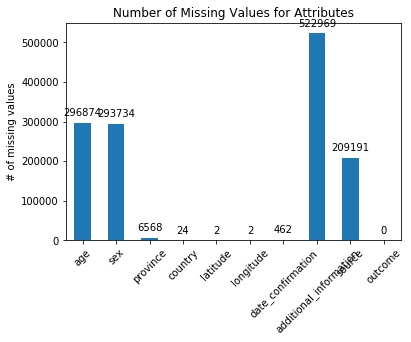

In [19]:
nan_count = idiv_case.isnull().sum()
missing_value_plot = nan_count.plot(kind='bar', rot=45, title = "Number of Missing Values for Attributes")
missing_value_plot.set_ylabel('# of missing values')
bar_annotation(missing_value_plot)

## 12. Longitude & Latitude for individual cases

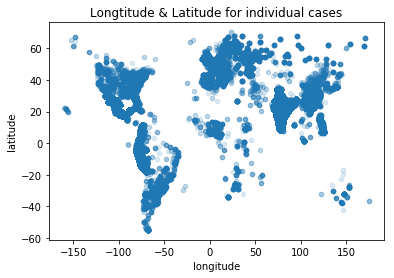

In [20]:
idiv_case.plot(kind='scatter', x="longitude", y="latitude", alpha=0.15, title = "Longtitude & Latitude for individual cases")

## 13. Female vs Male outcomes
## No significant differences in outcome or # of cases between different gender

Text(0, 0.5, '# of individual cases')

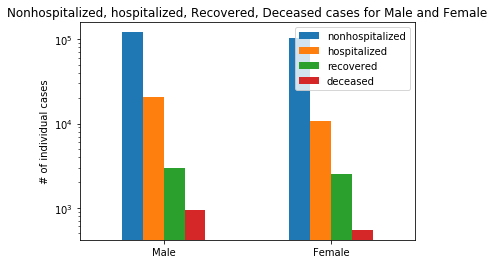

In [21]:
male_cases = idiv_case[idiv_case['sex'] == 'male']['outcome'].value_counts()
female_cases = idiv_case[idiv_case['sex'] == 'female']['outcome'].value_counts()
df = pd.DataFrame(male_cases).transpose()
df = df.append(female_cases).set_index(pd.Index(['Male','Female']))
plot = df.plot(kind='bar', rot = 0, logy = True, title='Nonhospitalized, hospitalized, Recovered, Deceased cases for Male and Female')
plot.set_ylabel('# of individual cases')

## 14. Number of cases for every age group

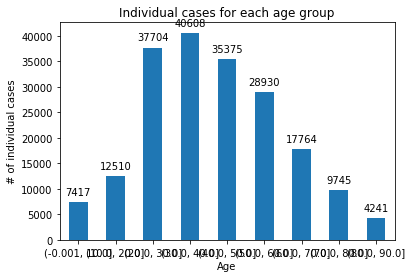

In [22]:
age = idiv_case[pd.to_numeric(idiv_case['age'], errors='coerce').notnull()]['age'].astype(float).astype(int)
out = pd.cut(age, bins=np.arange(0, 100, 10), include_lowest=True)
cases_by_age_plot = out.value_counts(sort=False).plot(kind='bar', rot = 0, title = "Individual cases for each age group")
cases_by_age_plot.set_ylabel('# of individual cases')
cases_by_age_plot.set_xlabel('Age')
bar_annotation(cases_by_age_plot)

## 15. Countries with more than 1000 cases

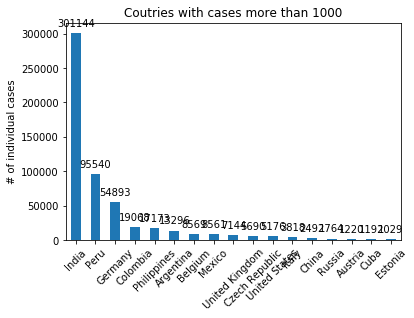

In [23]:
country_cases = idiv_case['country'].dropna().value_counts()
country_cases = country_cases[country_cases > 1000]
country_cases_plot = country_cases.plot(kind='bar', rot=45, title = "Coutries with cases more than 1000")
country_cases_plot.set_ylabel('# of individual cases')
bar_annotation(country_cases_plot)

## 16. Number of cases per month (Jan 01 ~ Jun 16)

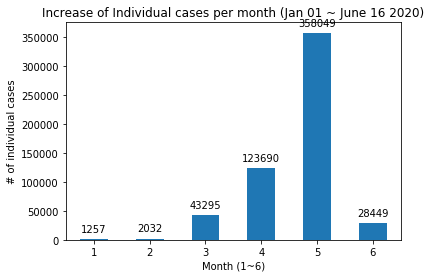

In [24]:
case_time_str = idiv_case['date_confirmation'].dropna()
case_time = pd.to_datetime(case_time_str, dayfirst=True, errors='coerce').dropna()
month = pd.DatetimeIndex(case_time).month
case_per_month_plot = month.value_counts().sort_index().plot(kind='bar', rot=0, title = "Increase of Individual cases per month (Jan 01 ~ June 16 2020)")
case_per_month_plot.set_ylabel('# of individual cases')
case_per_month_plot.set_xlabel('Month (1~6)')
bar_annotation(case_per_month_plot)

## 17. Aggregated individual cases for each outcome

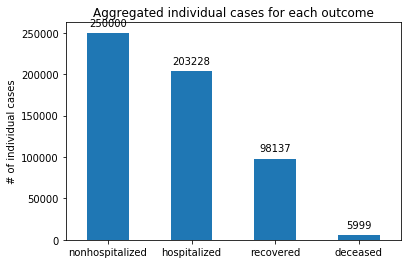

In [25]:
outcome = idiv_case['outcome'].value_counts()
outcome_plot = outcome.plot(kind='bar', rot=0, title = "Aggregated individual cases for each outcome")
outcome_plot.set_ylabel('# of individual cases')
bar_annotation(outcome_plot)

## 18. Province count for each country. Notice that Peru has individual reports from 191 provinces. 

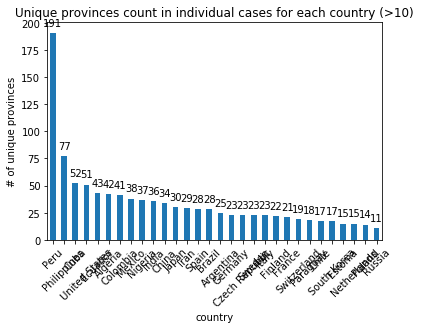

In [26]:
province_country = idiv_case[['province', 'country']].dropna()
province_per_country = province_country.groupby('country')['province'].nunique().sort_values(ascending = False)
province_per_country = province_per_country[province_per_country > 10]
province_per_country_plot = province_per_country.plot(kind='bar', rot=45, title = "Unique provinces count in individual cases for each country (>10)")
province_per_country_plot.set_ylabel('# of unique provinces')
bar_annotation(province_per_country_plot)